# Quickstart for TARDIS

After the [installation](../installation.rst) start a jupyter server executing `jupyter notebook` on the commandline in a directory that contains the configuration file (in our example `tardis_example.yml`, which can be downloaded [here](https://raw.githubusercontent.com/tardis-sn/tardis/master/docs/models/examples/tardis_example.yml)). The atomic database (for more info refer to [atomic data](../atomic/atomic_data.rst) ) and a configuration file (more info at [configuration](../configuration/index.rst) ). You can obtain a copy of the atomic database from the
(https://github.com/tardis-sn/tardis-refdata) repository
(`atom_data` subfolder). We recommended to use the
`kurucz_cd23_chianti_H_He.h5` dataset (which is auto-downloaded in the second cell already).

In [1]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data

/home/kervin/anaconda3/envs/tardis/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/home/kervin/anaconda3/envs/tardis/lib/python3.6/site-packages/tardis_sn-3.0.dev3414-py3.6-linux-x86_64.egg/tardis/io/util.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# standard bokeh imports
from bokeh.io import output_notebook, show, reset_output

# other bokeh imports
import bokeh
from bokeh.plotting import figure
# more imports in cells below as needed

# other imports
import numpy as np
import pandas as pd

In [7]:
# configure the default output state to generate output in notebook cells when show() is called
# in colab, output_notebook() is called in each cell (this is not always the case)
output_notebook()

Loading BokehJS ...

# Downloading the atomic data

In [4]:
# the data is automatically downloaded
download_atom_data('kurucz_cd23_chianti_H_He')

[tardis.io.atom_data.atom_web_download][INFO   ]  Downloading atomic data from https://media.githubusercontent.com/media/tardis-sn/tardis-refdata/master/atom_data/kurucz_cd23_chianti_H_He.h5 to /home/kervin/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (atom_web_download.py:47)


# Running the simulation (long output)

In [5]:
#TARDIS now uses the data in the data repo
sim = run_tardis('tardis_example.yml')

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:74)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /home/kervin/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:29)
[py.warnings         ][WARNING]  /home/kervin/anaconda3/envs/tardis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:99)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:184)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:187)
[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.96915e+

[tardis.simulation.base][INFO   ]  t_inner 10123.177 K -- next t_inner 11180.783 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 10/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.28170e+43 erg / s Luminosity absorbed = 4.19511e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      10666.223660  11427.410445  0.445097  0.500788
	5      11000.288585  11612.349822  0.163424  0.193129
	10     10822.884326  11373.245169  0.101641  0.121622
	15     10384.181273  11047.955461  0.078432  0.090937

 (base.py:350)
[tardis.simulation.base][INFO   ]  t_inner 11180.783 K -- next t_inner 10164.432 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 11/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 8.79074e+42 erg / s Lum

[tardis.simulation.base][INFO   ]  t_inner 10314.623 K -- next t_inner 11009.102 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 20/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.21062e+43 erg / s Luminosity absorbed = 3.88405e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Simulation finished in 20 iterations and took 63.06 s (base.py:308)


# Plotting the Spectrum (Zoomable Plot)

Populating the interactive namespace from numpy and matplotlib
[py.warnings         ][WARNING]  /home/kervin/anaconda3/envs/tardis/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure', 'show']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
 (warnings.py:99)


<IPython.core.display.Javascript object>


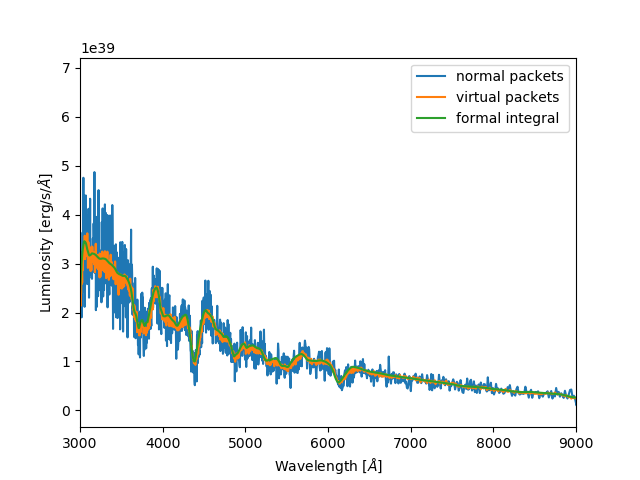

(3000, 9000)

In [6]:
%pylab notebook

spectrum = sim.runner.spectrum
spectrum_virtual = sim.runner.spectrum_virtual
spectrum_integrated = sim.runner.spectrum_integrated

plot(spectrum.wavelength, spectrum.luminosity_density_lambda, label='normal packets')
plot(spectrum.wavelength, spectrum_virtual.luminosity_density_lambda, label='virtual packets')
plot(spectrum.wavelength, spectrum_integrated.luminosity_density_lambda, label='formal integral')
xlabel('Wavelength [$\AA$]')
ylabel('Luminosity [erg/s/$\AA$]')
legend()
xlim(3000, 9000)